# Part 1 - EDA #

In [161]:
from sklearn.datasets import make_blobs
blobs, blob_labels = make_blobs(n_samples=1000, n_features=5) #I got this from the example in the project instructions
blobs

array([[ 0.27908148, -4.31465189,  9.53587532, -7.53959701,  9.65089889],
       [-0.93044872, -4.8141275 ,  7.65567269, -8.27740868,  8.71854418],
       [-5.72097224, -3.1013809 , -3.16458557, -7.97959638, -4.90003958],
       ...,
       [-4.50910238, -3.58607672, -5.15198426, -7.81559599, -7.89375212],
       [-7.93557281,  2.38551862, -2.19405796, -9.65122553, -4.86748442],
       [ 0.62423018, -5.21321108,  9.90563058, -7.37105559,  8.73376164]])

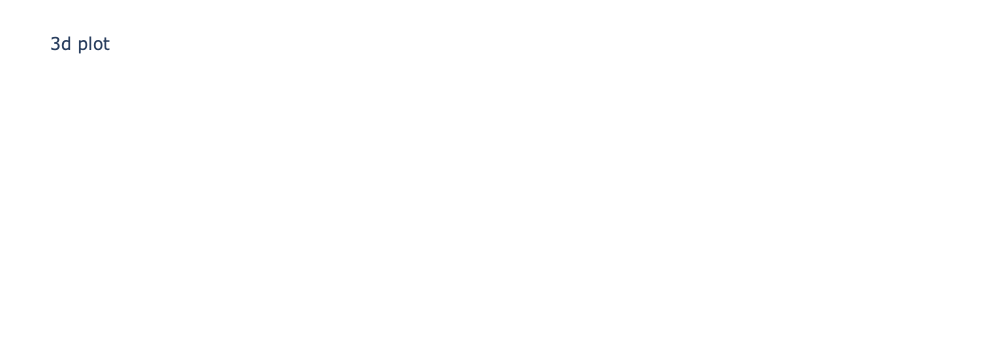

In [162]:
#source for 3d scatter plot: https://plotly.com/python/3d-scatter-plots/
import plotly.express as px 
fig = px.scatter_3d(blobs, x = blobs[:,0], y = blobs[:,2], z = blobs[:,1], title="3d plot")
fig.show()

about 1/3 of the data tends to have high Z and Y values, but a negative X value
another third has low Z, x, and y values
and the final third has high x, high y, and high z values.

Overall, there are three clear clusters

# Part 2 -- implementing my own kmean as well as using sklearn's version #

In [163]:
#SKLearn's implementation
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(blobs)
centers = kmeans.cluster_centers_  #this is the dimensions of where the clusters are. Think s, m, l, xl

#my implementaiton:
from KMeans_implementation import KMeans_implementation
kmeans2 = KMeans_implementation(n_clusters=3)
kmeans2_clusters = kmeans2.fit(blobs) 
centers2 = kmeans2.cluster_centers_

centers

array([[ 0.26111303, -3.35541639,  8.70682215, -7.73176508,  9.01428618],
       [-8.64164208,  1.56165924, -1.45490315, -9.51861288, -5.07675546],
       [-5.83756129, -3.19047094, -4.1985895 , -8.48838443, -6.92521583]])

In [164]:
centers2

array([[-8.54307952,  1.61113299, -1.1497484 , -9.72248613, -4.60691189],
       [-6.64586436, -1.91873732, -3.58968186, -8.67656072, -6.63473635],
       [ 0.26111303, -3.35541639,  8.70682215, -7.73176508,  9.01428618]])

it is encouraging to see the same results for both

In [165]:
kmeans.labels_ 

array([0, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 2,
       2, 1, 0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 1, 0,
       0, 1, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0,
       2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0,
       0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1,
       2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 1, 2, 2, 2, 0, 0, 0, 1, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0,
       2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 1,
       0, 1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1,

A normal distrubution in statistics is a bell curve. The mean (average) is at 0, and the height of that bell curve is 1 always.

Kmeans works best when it is applied to a normal distribution. It works fine on raw data like here, but you really wanna standardize the data, which we can use with a library in sklearn called StandardScaler. However, I will not be doing that as it is not required for this dataset. 

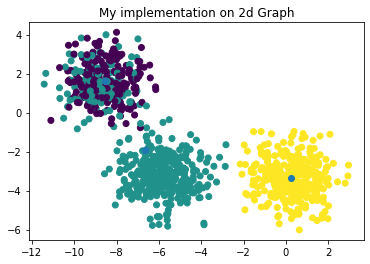

In [166]:
#plot my own implementation on a 2d graph

plt.scatter(blobs[:,0], blobs[:,1], c=kmeans2.labels_)
plt.scatter(kmeans2_clusters[:,0], kmeans2_clusters[:,1])

plt.title("My implementation on 2d Graph")
plt.show()

# comparing #

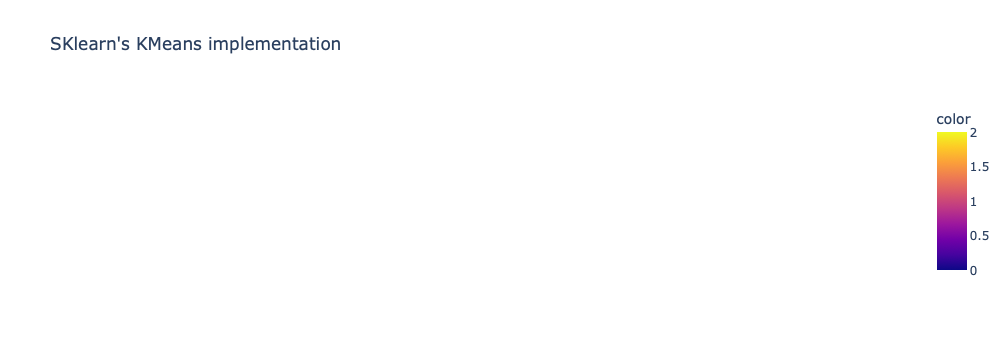

In [167]:
fig = px.scatter_3d(blobs, x = blobs[:,0], y = blobs[:,1], z = blobs[:,2],color=kmeans.labels_, title = "SKlearn's KMeans implementation")
fig.show()

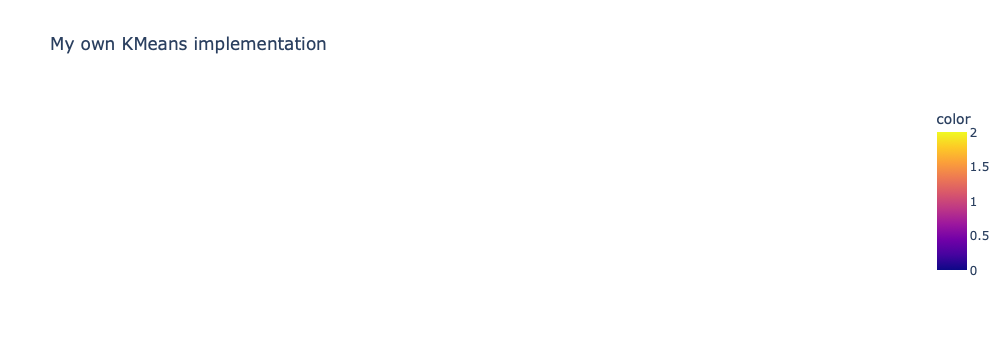

In [168]:
fig = px.scatter_3d(blobs, x = blobs[:,0], y = blobs[:,1], z = blobs[:,2], color=kmeans2.labels_, title = "My own KMeans implementation")
fig.show()

Overall, my implementation performed similarly to SKlearn's implementation. Although the colors are sometimes different in the graph using my own implementation, the clusters are still in the same location. I am unsure why the colors match SKlearn's implementation sometimes, but other times I run the notebook, it changes. Regardless, the clusters remain in the same position as SKLearn's.